## Homework 7


Name:

Comments for instructor/grader:


## Exercise 6.12: Glycolysis - relaxation method

The biochemical process of *glycolysis*, the
  breakdown of glucose in the body to release energy, can be modeled by the
  equations
$$
{dx\over dt} = -x + ay + x^2 y, \qquad
{dy\over  dt} = b - ay - x^2 y.
$$

Here $x$ and $y$ represent concentrations of two chemicals, ADP and F6P,
and $a$ and $b$ are positive constants.  One of the important features of
nonlinear linear equations like these is their *stationary
  points*, meaning values of $x$ and $y$ at which the derivatives of both
variables become zero simultaneously, so that the variables stop changing
and become constant in time.  Setting the derivatives to zero above, the
stationary points of our glycolysis equations are solutions of

$$
-x + ay + x^2 y = 0, \qquad b - ay - x^2 y = 0.
$$


**a)** Demonstrate analytically that the solution of these equations is

$$
x = b,\qquad y = {b\over a+b^2}
$$

From, we solve the following equations to find x & y as above:

$$
-x + ay + x^2 y = 0, \qquad b - ay - x^2 y = 0
$$

Where we can use the second equation to get:
$$
ay + x^2 y = b
$$

We then substitute $x^2 y = b - ay$ into the first equation to get:

$$
-x + ay + (b-ay) = 0
$$

=>

$$
x = b
$$

We also substitute this result for x into the second equation to get:

$$
y = {b - ay\over b^2}
$$

Then, we can solve for $y$ as follows:

$$
y = {b\over a+b^2}
$$

Therefore,

$$
x = b,\qquad y = {b\over a+b^2}
$$

**Pts /5**

**b)** Show that the equations can be rearranged to read

$$
x = y(a+x^2),\qquad y = {b\over a+x^2}.
$$

 

We are given that,

$$
{dx\over dt} = -x + ay + x^2 y \qquad
{dy\over  dt} = b - ay - x^2 y
$$

First, we re-arrange the first equation to get,

$$
x + x^2 y = ay
$$

We can use $y = (b-ay)/x^2$ from the second equatio to eliminate $y$,

$$
x + x^2 {(b-ay)\over x^2} = a {(b-ay)\over x^2}
$$

=>

$$
x = y(a+x^2)
$$

Similarly, the second equation can be re-arranged to get,
$$
x^2 y = b - ay
$$

Like from part a, we can use $y = (b-ay)/x^2$ to eliminate $y$,

$$
x^2 {(b-ay)\over x^2} = b - ay
$$

=>

$$
y = {b\over a+x^2}
$$

Therefore,

$$
x = y(a+x^2),\qquad y = {b\over a+x^2}
$$

**/5pts** 

Write a program to solve these for the stationary point using the
relaxation method with $a=1$ and $b=2$.  You should find that the method
fails to converge to a solution in this case. Output x,y, and the iteration number for 100 iterations.

In [1]:
### PH 322 - HW #7, Q6.12.b.)
## Credits: ChatGPT for math implementation

a = 1.0
b = 2.0
x = 0.0
y = 0.0
tolerance = 1e-6
max_iterations = 100

for i in range(max_iterations):
    xnew = y*(a+x**2)
    ynew = b/(a+x**2)
    if abs(xnew - x) < tolerance and abs(ynew - y) < tolerance:
        print("Converged to x = {}, y = {} after {} iterations".format(xnew, ynew, i+1))
        break
    x, y = xnew, ynew
else:
    print("Failed to converge after {} iterations".format(max_iterations))
print("Final values: x = {}, y = {}".format(x, y))

Failed to converge after 100 iterations
Final values: x = 0.636383990038212, y = 1.999928171652484


**/5pts**

**c)**  Find a different way to rearrange the equations such that when you
  apply the relaxation method again it now converges to a fixed point and
  gives a solution.  Have your code output the solution x,y. 

$$
{b \over x^2 + a} = a - x.
$$
=>
$$
x^3 + ax - b = 0.
$$

In [29]:
### PH 322 - HW #7, Q6.12.c.)
## Credits: ChatGPT for math implementation

a = 1.0
b = 1.0
x = 0.5
y = 0.5
tolerance = 1e-6
max_iterations = 100

for i in range(max_iterations):
    xnew = (b - a*y*x**2)/(1 + x**2*y**2)
    ynew = (b - a*xnew**2*y)/(1 + xnew**2*y**2)
    if abs(xnew - x) < tolerance and abs(ynew - y) < tolerance:
        print("Converged to x = {}, y = {} after {} iterations".format(xnew, ynew, i+1))
        break
    x, y = xnew, ynew
else:
    print("Failed to converge after {} iterations".format(max_iterations))
print("Final values: x = {}, y = {}".format(x, y))

Converged to x = 0.6368836043108796, y = 0.6368826417443407 after 54 iterations
Final values: x = 0.6368826212877992, y = 0.6368822857057842


**Pts /5pts**

**Total Exercise Pts /20**

## Exercise 6.14:  Particle in a well- Binary search

Consider a square potential well of width $w$, with walls of height $V$:

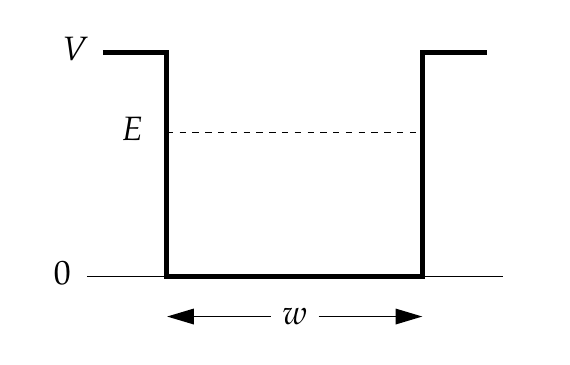


Using Schrödinger's equation, it can be shown that the allowed
energies $E$ of a single quantum particle of mass $m$ trapped in the well
are solutions of
$
\tan \sqrt{w^2mE/2\hbar^2} = \left\lbrace\begin{array}{ll}
  \sqrt{(V-E)/E} & \qquad\mbox{for the even numbered states,} \\
  - \sqrt{E/(V-E)}  & \qquad\mbox{for the odd numbered states,}
\end{array}\right.
$

where the states are numbered starting from 0, with the ground state being
state 0, the first excited state being state 1, and so forth.

**a)**

 For an electron (mass $9.1094\times10^{-31}\,$kg) in a well with $V =
  20\,$eV and $w = 1\,$nm, write a Python program to plot the three
  quantities

$$
y_1 = \tan \sqrt{w^2mE/2\hbar^2},\qquad
y_2 = \sqrt{V-E\over E},\qquad
y_3 = -\sqrt{E\over V-E},
$$

on the same graph, as a function of $E$ from $E=0$ to $E=20\,$eV.  Include a legend and label each function. From
your plot make approximate estimates of the energies of the first six
energy levels of the particle.  Hint: You will need to zoom into your plot to find points of intersection. Do not include discontinuities.  


C:\Users\Dan\AppData\Local\Temp\ipykernel_36748\1409463639.py:19: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt((V-E)/E)
C:\Users\Dan\AppData\Local\Temp\ipykernel_36748\1409463639.py:22: RuntimeWarning: divide by zero encountered in divide
  return -np.sqrt(E/(V-E))


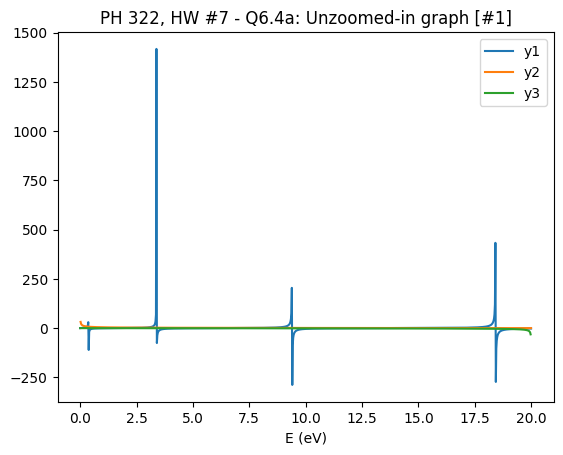

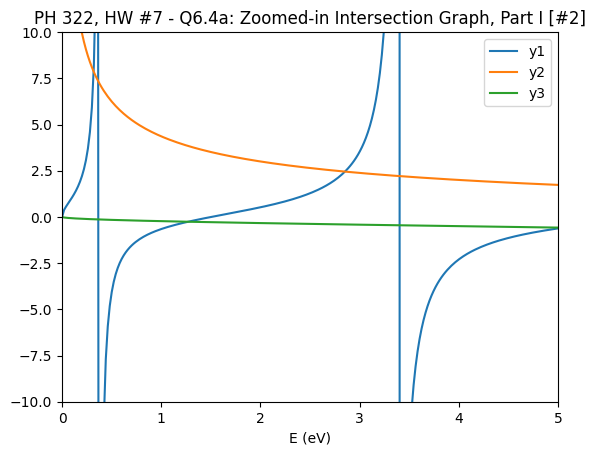

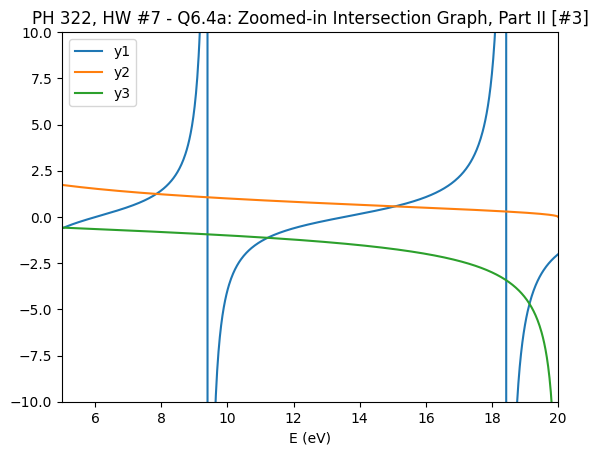

In [34]:
### PH 322 - HW #7, Q6.14.a.)
## Credits: ChatGPT for numpy & matplotlib implementation

import numpy as np
import matplotlib.pyplot as plt

## Constants
m = 9.1094e-31  # Mass of electron in kg
hbar = 1.0546e-34  # Planck's constant over 2*pi in J.s
eV = 1.6022e-19  # Electron volt in J
V = 20*eV  # Height of well walls
w = 1e-9  # Width of well in m

## Define functions
def y1(E):
    return np.tan(np.sqrt(w**2*m*E/2/hbar**2))

def y2(E):
    return np.sqrt((V-E)/E)

def y3(E):
    return -np.sqrt(E/(V-E))

## Plot 1
E = np.linspace(0, 20*eV, num=1000)
plt.plot(E/eV, y1(E), label="y1")
plt.plot(E/eV, y2(E), label="y2")
plt.plot(E/eV, y3(E), label="y3")
plt.title('PH 322, HW #7 - Q6.4a: Unzoomed-in graph [#1]')
# plt.xlim(0, 5)
# plt.ylim(-10, 10)
plt.xlabel("E (eV)")
plt.legend()
plt.show()

## Plot 2
E = np.linspace(0, 20*eV, num=1000)
plt.plot(E/eV, y1(E), label="y1")
plt.plot(E/eV, y2(E), label="y2")
plt.plot(E/eV, y3(E), label="y3")
plt.title('PH 322, HW #7 - Q6.4a: Zoomed-in Intersection Graph, Part I [#2]')
plt.xlim(0, 5)
plt.ylim(-10, 10)
plt.xlabel("E (eV)")
plt.legend()
plt.show()

## Plot 2
E = np.linspace(0, 20*eV, num=1000)
plt.plot(E/eV, y1(E), label="y1")
plt.plot(E/eV, y2(E), label="y2")
plt.plot(E/eV, y3(E), label="y3")
plt.title('PH 322, HW #7 - Q6.4a: Zoomed-in Intersection Graph, Part II [#3]')
plt.xlim(5, 20)
plt.ylim(-10, 10)
plt.xlabel("E (eV)")
plt.legend()
plt.show()

At level 0, ~1.6 eV (?)

At level 1, ~4 eV (?)

At level 2, ~7.2 eV (?)

At level 3, ~10.5 eV (?)

At level 4, ~14.5 eV (?)

At level 5, ~18.5 eV (?)



**Pts /10**

**b)** Write a second program to calculate the values of the first six
  energy levels in electron volts to an accuracy of $0.001\,$eV using
  binary search. Have your program output the 6 values in units of eV.  Hint: Zoom into your plot to define appropriate initial intervals.
 


In [40]:
### PH 322 - HW #7, Q6.14.b.)
## Credits: ChatGPT for math implementation

def binary_search(func, a, b, target, tol):
    while abs(a - b) > tol:
        mid = (a + b) / 2
        if func(mid) < target:
            a = mid
        else:
            b = mid
    return (a + b) / 2

def find_energy_level(is_even, level_num, tol=0.001*eV):
    if is_even:
        target_func = lambda E: y1(E) - y2(E)
    else:
        target_func = lambda E: y1(E) - y3(E)

    # Set the initial search interval based on the plot
    if level_num == 0:
        a, b = 0, 3*eV
    elif level_num == 1:
        a, b = 3*eV, 5*eV
    elif level_num == 2:
        a, b = 5*eV, 9*eV
    elif level_num == 3:
        a, b = 9*eV, 12*eV
    elif level_num == 4:
        a, b = 12*eV, 17*eV
    elif level_num == 5:
        a, b = 17*eV, 20*eV
    else:
        raise ValueError("Invalid level number")

    # Perform binary search
    energy = binary_search(target_func, a, b, 0, tol)
    return energy

# Find the first six energy levels
energy_levels = [find_energy_level(level_num % 2 == 0, level_num) for level_num in range(6)]

# Print the energy levels in eV
for i, E in enumerate(energy_levels):
    # A lil unnecessarily fancy way but wanted to make sure the number output was correct, hehe
    if i == 0:
         print(f"Ground Energy Level: {E/eV:.3f} eV")
    elif i == 1:
         print(f"{i}st Energy Level: {E/eV:.3f} eV")
    elif i == 2:
         print(f"{i}nd Energy Level: {E/eV:.3f} eV")
    elif i == 3:
         print(f"{i}rd Energy Level: {E/eV:.3f} eV")
    else:
        print(f"{i}th Energy Level: {E/eV:.3f} eV")

Ground Energy Level: 2.851 eV
1st Energy Level: 5.000 eV
2nd Energy Level: 7.850 eV
3rd Energy Level: 11.215 eV
4th Energy Level: 15.071 eV
5th Energy Level: 19.135 eV


**Pts /10**

**Total Exercise Pts /20**

## Exercise 6.16: Lagrange point - Newton's method

There is a magical point between the Earth and the Moon, called the $L_1$ Lagrange point, at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.  This works because the inward pull of the Earth and the outward pull of the Moon combine to create exactly the needed centripetal force that keeps the satellite in its orbit. Check your textbook for a diagram of the setup.

**a)** Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, show that the distance $r$ from the center of the Earth to the $L_1$ point satisfies

\begin{equation*}
{GM\over r^2} - {Gm\over(R-r)^2} = \omega^2 r,
\end{equation*}

where $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's
gravitational constant, and $\omega$ is the angular velocity of both the
Moon and the satellite.

First, we know the gravitational force based on Earth, which can be written as,

$$F_{E} = \frac{GMm}{r^2}$$

where $G$ is Newton's gravitational constant, $M$ is Earth's mass, and $m$ is the satellite's mass, at a given point, $L_1$.

The gravitational force due to the Moon is,

$$F_{M} = \frac{GmM_{M}}{(R-r)^2}$$

where $M_{M}$ is Moon's mass.

Also, to include the centrifugal force due of rotation; since both the Moon and the satellite have the same angular velocity, $\omega$, thus,

$$F_{c} = m\omega^2 r$$

For equilibrium at point $L_1$, the effective gravitational force must equate to the centrifugal force. Thus,

$$F_{E} - F_{M} = F_{c}$$

Substituting the above equations,

$$\frac{GMm}{r^2} - \frac{GmM_{M}}{(R-r)^2} = m\omega^2 r$$

Since $m$ appears in every term, we divide both sides by $m$ - therefore,

$$\frac{GM}{r^2} - \frac{GM_{M}}{(R-r)^2} = \omega^2 r$$

**Pts /5**

**b)** The equation above is a fifth-order polynomial equation in $r$ (also called a quintic equation).  Such equations cannot be solved exactly in closed form, but it's straightforward to solve them numerically.  Write a program that uses Newton's method to solve for the distance $r$ from the Earth to the $L_1$ point.  Compute a solution accurate to at least four significant figures. Output your solution with error estimate. 

  The values of the various parameters are:
\begin{align*}
G &= 6.674\times10^{-11}\,\mathrm{m}^3\mathrm{kg}^{-1}\mathrm{s}^{-2}, \\
M &= 5.974\times10^{24}\,\mathrm{kg}, \\
m &= 7.348\times10^{22}\,\mathrm{kg}, \\
R &= 3.844\times10^8\,\mathrm{m}, \\
\omega &= 2.662\times10^{-6}\,\mathrm{s}^{-1}.
\end{align*}
You will also need to choose a suitable starting value for $r$. Think about what value r should be. 

In [41]:
### PH 322 - Q6.16 - Dan Jang
## Credits to ChatGPT for numpy implementation

import numpy as np

# Constants
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
omega = 2.662e-6
tol = 1e-10

# Function and its derivative
def f(r):
    return G*M/r**2 - G*m/(R-r)**2 - omega**2*r

def df(r):
    return -2*G*M/r**3 - 2*G*m/(R-r)**3 - omega**2

# Initial guess
r = 0.9*R

# Newton's method
while True:
    r_new = r - f(r)/df(r)
    if abs(r_new - r) < tol:
        break
    r = r_new

print(f"r = {r:.10f}")

# ## Libraries
# import math
# import numpy as np
# from matplotlib.pyplot import plot as plt

# ## Constants
# G = 6.674e-11
# capital_m = 5.974e24
# lower_m = 7.348e22
# R = 3.844e8
# w = 2.662e-6

# def quintic_eq(G, capital_m, lower_m, R, w):
#     # Original Eq: GM / r^2 - Gm / (R - r)^2 = w^2 r
#     # Analytically Solved Eq: (GM / r^2 - Gm / (R - r^2)) / w^2 = r

#     result = ((G * capital_m) / (r**2) - ((G * lower_M) / ((R - r)**2)) / (w ** 2))

#     return result

# def main():
    

r = 326045071.6653554440


**r = 326045071.6653554440 +/- 1 x 10^-10 m**

**Pts /10**

**Total Exercise Pts /15**

## Exercise 7.2 - Fourier transform of sunspot cycles

In the on-line resources there is a file called _sunspots.txt_, which contains the observed number of sunspots on the Sun for each month since January 1749.  The file contains two columns of numbers, the first representing the month and the second being the sunspot number.

**a)** Write a program that reads the data in the file and makes a graph of sunspots as a function of time.  You should see that the number of sunspots has fluctuated on a regular cycle for as long as observations have been recorded.  Make an estimate of the length of the cycle in months.

In [1]:
#Type your code here

**Length of cycle in months:**

**Pts /5**

**b)** Modify your program to calculate the Fourier transform of the sunspot data and then make a graph of the magnitude squared $|c_k|^2$ of the Fourier coefficients as a function of $k$---also called the _power spectrum_ of the sunspot signal.  You should see that there is a noticeable peak in the power spectrum at a nonzero value of $k$.  The appearance of this peak tells us that there is one frequency in the Fourier series that has a higher amplitude than the others around it---meaning that there is a large sine-wave term with this frequency, which corresponds to the periodic wave you can see in the original data.

In [10]:
#Type your code here

**Pts /10**

**c)**  Find the approximate value of $k$ to which the peak corresponds.
  What is the period of the sine wave with this value of $k$?  You should
  find that the period corresponds roughly to the length of the cycle that
  you estimated in part (a).

*Type your answer here*

**Pts /5**

**Total Exercise Pts /20**

## Total Pts /75